In [1]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [2]:
import os
model_path = '/content/drive/MyDrive/KGE-HAKE-master/models/result'
os.chdir(model_path)
os.listdir(model_path)

['HAKE_wn18rr_0',
 'HAKE_FB15k-237_0',
 'HAKE_YAGO3-10_0',
 'ModE_wn18rr_0',
 'ModE_FB15k-237_0',
 'ModE_YAGO3-10_0']

In [ ]:
data_path =  '/content/drive/MyDrive/KGE-HAKE-master/data/wn18rr'
os.chdir(data_path)
os.listdir(data_path)

['relations.dict', 'test.txt', 'train.txt', 'valid.txt', 'entities.dict']

In [ ]:
# Path to the uploaded file
file_path = '/content/drive/MyDrive/KGE-HAKE-master/data/wn18rr/test.txt'

# Initialize an empty list to store the data
data = []

# Open the file and read line by line
with open(file_path, 'r') as file:
    for line in file:
        # Strip the newline character and split by tab
        parts = line.strip().split('\t')
        # Append the parts as a tuple (or any structure you need) to the list
        data.append(tuple(parts))

# Example: print the first 5 lines to check
print(data[:5])


[('06845599', '_member_of_domain_usage', '03754979'), ('00789448', '_verb_group', '01062739'), ('08860123', '_member_of_domain_region', '05688486'), ('02233096', '_member_meronym', '02233338'), ('01371092', '_hypernym', '01352059')]


In [ ]:
#
member_data = []
# Open and read the file
with open(file_path, 'r') as file:
    for line in file:
        if "_member_meronym" in line:
            parts = line.strip().split('\t')
            member_data.append(parts)

print(f"Filtered {len(member_data)} lines containing '_member_meronym'.")


Filtered 253 lines containing '_member_meronym'.


In [ ]:
# Path to the entities.dict file
entities_dict_path = '/content/drive/MyDrive/KGE-HAKE-master/data/wn18rr/entities.dict'

# Create a dictionary to hold the ID -> Name mapping
id_to_name = {}

# Open and read the file
with open(entities_dict_path, 'r') as file:
    for line in file:
        # Each line is expected to be in the format: "ID\tName\n"
        parts = line.strip().split('\t')
        # Assuming the file structure is ID followed by Name
        if len(parts) == 2:
            id_to_name[parts[1]] = parts[0]

# Now `id_to_name` dictionary can be used to lookup names by ID


In [ ]:
# Path to the entities.dict file
relation_dict_path = '/content/drive/MyDrive/KGE-HAKE-master/data/wn18rr/relations.dict'

# Create a dictionary to hold the ID -> Name mapping
rel_to_id = {}

# Open and read the file
with open(relation_dict_path, 'r') as file:
    for line in file:
        # Each line is expected to be in the format: "ID\tName\n"
        parts = line.strip().split('\t')
        # Assuming the file structure is ID followed by Name
        if len(parts) == 2:
            rel_to_id[parts[1]] = parts[0]

# Now `id_to_name` dictionary can be used to lookup names by ID


In [ ]:
rel_to_id

{'_hypernym': '0',
 '_derivationally_related_form': '1',
 '_instance_hypernym': '2',
 '_also_see': '3',
 '_member_meronym': '4',
 '_synset_domain_topic_of': '5',
 '_has_part': '6',
 '_member_of_domain_usage': '7',
 '_member_of_domain_region': '8',
 '_verb_group': '9',
 '_similar_to': '10'}

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph from the hypernym relationships
G = nx.DiGraph()
G.add_edges_from([(parts[0], parts[2]) for parts in data])

# Draw the graph
plt.figure(figsize=(12, 12))
nx.draw(G, with_labels=False, node_size=5, node_color="lightblue", font_size=10)
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import os

"""
model_path
embedding_range
head_id
tail_id
"""
entity_embedding = np.load(os.path.join(model_path, 'HAKE_wn18rr_0/entity_embedding.npy'))

In [ ]:
relation_embedding = np.load(os.path.join(model_path, 'HAKE_wn18rr_0/relation_embedding.npy'))

In [ ]:
relation_embedding

array([[ 3.2626442e-04,  6.7314492e-03, -5.0260767e-04, ...,
        -1.7203738e-01, -1.2182481e-01, -1.2655544e-01],
       [-6.4512469e-06,  2.9640514e-06, -1.6001096e-02, ...,
        -5.7777703e-01, -7.1750224e-01, -5.7493365e-01],
       [-3.3452670e-05,  1.3520103e-02, -9.9662812e-03, ...,
        -5.0008911e-01, -4.8076302e-01, -4.8007229e-01],
       ...,
       [-6.9747432e-03,  1.3572090e-02,  6.5473992e-05, ...,
         7.7213573e-01,  6.3736504e-01,  7.6511937e-01],
       [ 5.5607170e-06,  1.5997924e-02,  2.3395503e-06, ...,
        -2.8893355e-01, -2.6984784e-01, -2.6933390e-01],
       [-1.6018577e-02,  1.5837773e-05, -1.5983287e-02, ...,
        -4.2680334e-02, -5.7682008e-02, -4.8300181e-02]], dtype=float32)

In [ ]:
relations = {}
with open('/content/drive/MyDrive/KGE-HAKE-master/data/wn18rr/relations.dict', 'r') as file:
    for line in file:
        # Splitting each line by the tab character
        key, value = line.strip().split('\t')
        relations[key] = value

# Showing a snippet of the resulting dictionary
list(entities.items())[:10]


[('0', '00260881'),
 ('1', '00260622'),
 ('2', '01332730'),
 ('3', '03122748'),
 ('4', '06066555'),
 ('5', '00645415'),
 ('6', '09322930'),
 ('7', '09360122'),
 ('8', '07193596'),
 ('9', '00784342')]

In [ ]:
entity_embedding.shape

(40943, 1000)

In [ ]:
entity_embedding.shape
embedding_range = 1000
head_id = 18671
tail_id = 11241


In [ ]:
ModErelation_embedding.shape

(11, 500)

In [ ]:
ModErelation_embedding = np.load(os.path.join(model_path, 'ModE_wn18rr_0/relation_embedding.npy'))

In [ ]:
relation_dict_path = '/content/drive/MyDrive/KGE-HAKE-master/data/FB15k-237/relations.dict'

# Create a dictionary to hold the ID -> Name mapping
dic = {}

# Open and read the file
with open(relation_dict_path, 'r') as file:
        for line in file:
        # Each line is expected to be in the format: "ID\tName\n"
            parts = line.strip().split('\t')
        # Assuming the file structure is ID followed by Name
            if len(parts) == 2:
                dic[parts[1]] = parts[0]
dic

{'/organization/organization/headquarters./location/mailing_address/state_province_region': '0',
 '/education/educational_institution/colors': '1',
 '/people/person/profession': '2',
 '/film/film/costume_design_by': '3',
 '/film/film/genre': '4',
 '/celebrities/celebrity/celebrity_friends./celebrities/friendship/friend': '5',
 '/tv/tv_producer/programs_produced./tv/tv_producer_term/producer_type': '6',
 '/film/film/executive_produced_by': '7',
 '/sports/sports_team/roster./basketball/basketball_roster_position/position': '8',
 '/award/award_nominee/award_nominations./award/award_nomination/nominated_for': '9',
 '/award/award_category/winners./award/award_honor/award_winner': '10',
 '/award/award_winner/awards_won./award/award_honor/award_winner': '11',
 '/music/artist/origin': '12',
 '/food/food/nutrients./food/nutrition_fact/nutrient': '13',
 '/film/film/distributors./film/film_film_distributor_relationship/region': '14',
 '/time/event/instance_of_recurring_event': '15',
 '/sports/pro

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def relation_mod(relation, dataset):

    relation_dict_path = f'/content/drive/MyDrive/KGE-HAKE-master/data/{dataset}/relations.dict'

# Create a dictionary to hold the ID -> Name mapping
    dic = {}

# Open and read the file
    with open(relation_dict_path, 'r') as file:
        for line in file:
        # Each line is expected to be in the format: "ID\tName\n"
            parts = line.strip().split('\t')
        # Assuming the file structure is ID followed by Name
            if len(parts) == 2:
                dic[parts[1]] = parts[0]
    relation_id = dic.get(relation, "Unknown ID")
    HAKErelation_embedding = np.load(os.path.join(model_path, f'HAKE_{dataset}_0/relation_embedding.npy'))
    ModErelation_embedding = np.load(os.path.join(model_path, f'ModE_{dataset}_0/relation_embedding.npy'))
    HAKEre = HAKErelation_embedding[int(relation_id)]
    ModEre = ModErelation_embedding[int(relation_id)]

    # The rest of your processing code remains the same
    phase_HAKEre, mod_HAKEre,_ = np.split(HAKEre, 3)
    mod_ModEre = ModEre
    mod_HAKE = np.abs(mod_HAKEre)
    mod_ModE = np.abs(mod_ModEre)
    # Visualization
    # Visualization
    weights_HAKE = np.ones_like(mod_HAKE) / len(mod_HAKE)
    weights_ModE = np.ones_like(mod_ModE) / len(mod_ModE)
    plt.figure(figsize=(8, 6))  # You can adjust the figure size for a better view
    bin_edges = np.linspace(min(np.min(mod_HAKE), np.min(mod_ModE)),
                        max(np.max(mod_HAKE), np.max(mod_ModE)),
                        101)  # 30 bins with 31 edges

    plt.hist(mod_HAKE, bins=bin_edges,weights=weights_HAKE,  alpha=0.9, label='HAKE', histtype='stepfilled')

# Plotting ModE histogram with 'step' filled
    plt.hist(mod_ModE, bins=bin_edges,weights=weights_ModE,  alpha=0.9, label="ModE", histtype='stepfilled')

# Remove 'plt.axis('equal')' as it's not typically used for histograms

    plt.title(f"relation: {relation}")
    plt.xlabel('Modulus Value')
    plt.legend()
    plt.xlim(0,4)
# Set a limit on the x-axis to improve visibility if needed
    #plt.xlim(left=min(np.min(mod_HAKE), np.min(mod_ModE)), right=max(np.max(mod_HAKE), np.max(mod_ModE)))

    plt.show()


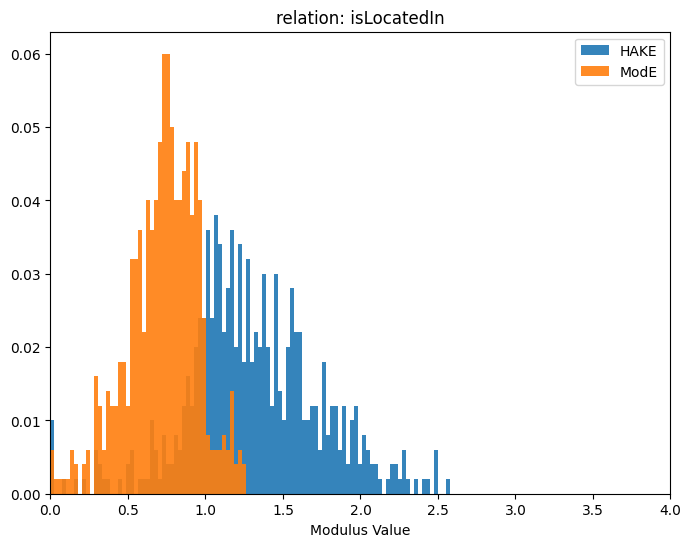

In [7]:
relation_mod("isLocatedIn", "YAGO3-10")

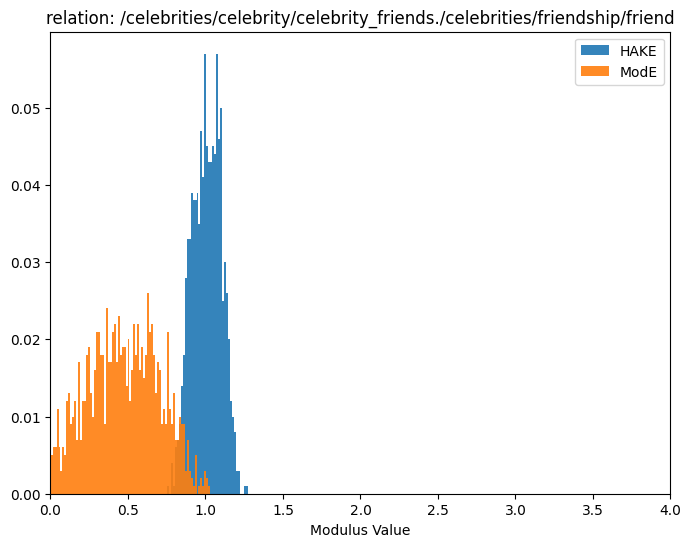

In [8]:
relation_mod("/celebrities/celebrity/celebrity_friends./celebrities/friendship/friend","FB15k-237")

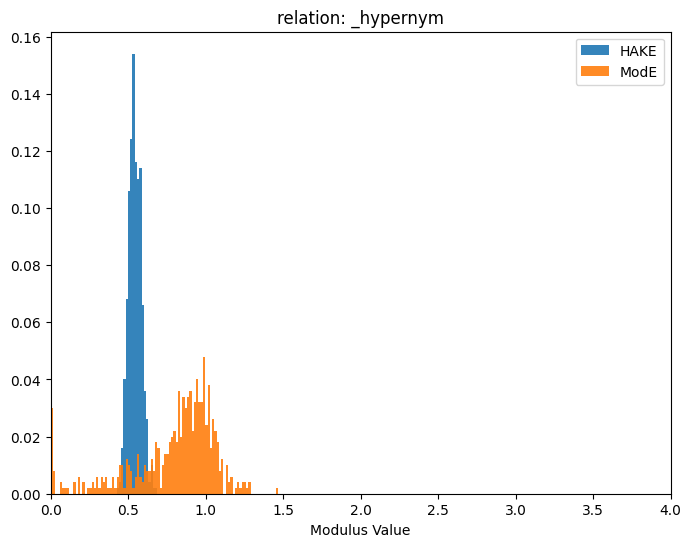

In [9]:
relation_mod('_hypernym','wn18rr')

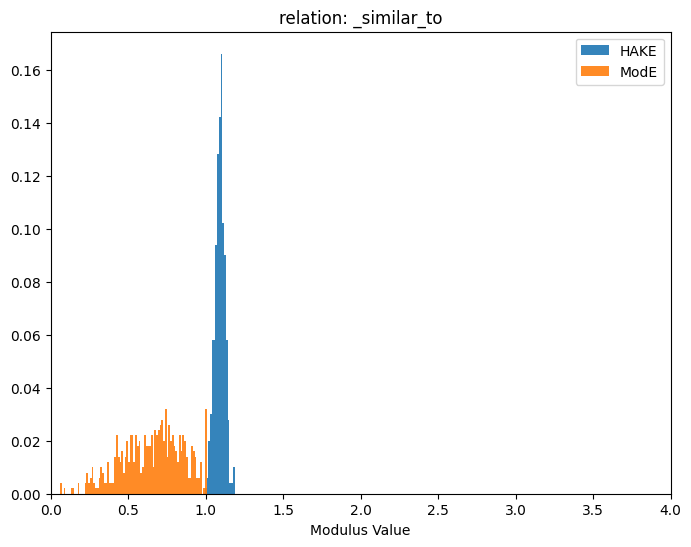

In [10]:
relation_mod("_similar_to", 'wn18rr')

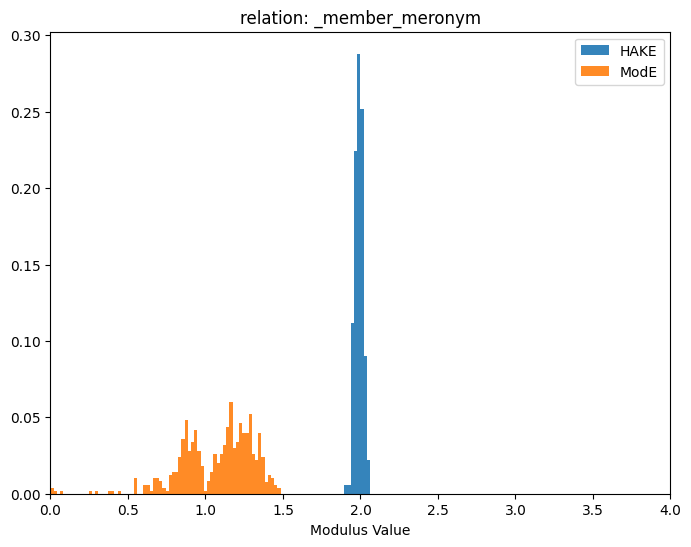

In [11]:
relation_mod("_member_meronym", 'wn18rr')

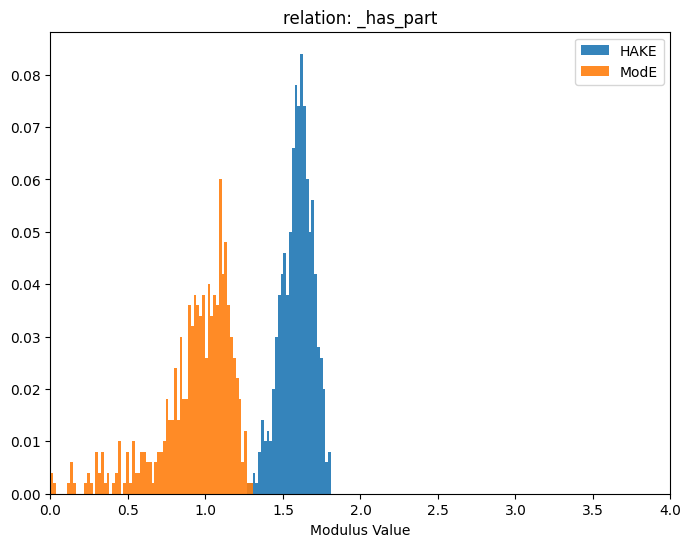

In [12]:
relation_mod('_has_part', 'wn18rr')

In [ ]:
def relation_phase(relation):
    embedding_range = (9.0 + 2.0) / 1000
    relation_dict_path = '/content/drive/MyDrive/KGE-HAKE-master/data/FB15k-237/relations.dict'

# Create a dictionary to hold the ID -> Name mapping
    dic = {}

# Open and read the file
    with open(relation_dict_path, 'r') as file:
        for line in file:
        # Each line is expected to be in the format: "ID\tName\n"
            parts = line.strip().split('\t')
        # Assuming the file structure is ID followed by Name
            if len(parts) == 2:
                dic[parts[1]] = parts[0]
    relation_id = dic.get(relation, "Unknown ID")
    HAKErelation_embedding = np.load(os.path.join(model_path, 'HAKE_FB15k-237_0/relation_embedding.npy'))

    HAKEre = HAKErelation_embedding[int(relation_id)]


    # The rest of your processing code remains the same
    phase_HAKEre, _ , _ = np.split(HAKEre, 3)

    phase_HAKE = np.abs(phase_HAKEre) / (embedding_range / np.pi)

    # Visualization
    # Visualization
    #weights_HAKE = np.ones_like(phase_HAKE) / len(phase_HAKE)

    plt.figure(figsize=(8, 6))  # You can adjust the figure size for a better view

    plt.hist(phase_HAKE,  alpha=0.9, label='HAKE', histtype='stepfilled')
    plt.title(f"relation: {relation}")
    plt.xlabel('Phase Value')
    plt.xticks([0, np.pi, 2*np.pi], ['0', '$\pi$', '$2\pi$'])
    plt.legend()
    #plt.xlim(0,4)
# Set a limit on the x-axis to improve visibility if needed
    #plt.xlim(left=min(np.min(mod_HAKE), np.min(mod_ModE)), right=max(np.max(mod_HAKE), np.max(mod_ModE)))

    plt.show()


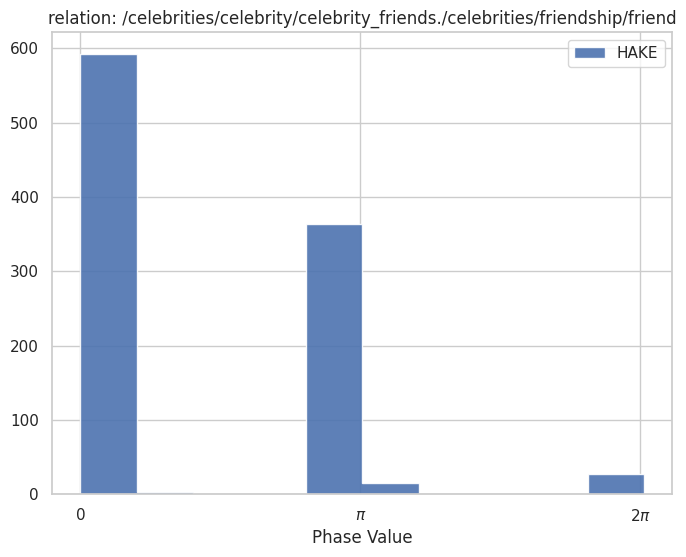

In [ ]:
relation_phase('/celebrities/celebrity/celebrity_friends./celebrities/friendship/friend')

In [ ]:
def relation_phase(relation):
    embedding_range = (6.0 + 2.0) / 500
    relation_dict_path = '/content/drive/MyDrive/KGE-HAKE-master/data/wn18rr/relations.dict'

# Create a dictionary to hold the ID -> Name mapping
    dic = {}

# Open and read the file
    with open(relation_dict_path, 'r') as file:
        for line in file:
        # Each line is expected to be in the format: "ID\tName\n"
            parts = line.strip().split('\t')
        # Assuming the file structure is ID followed by Name
            if len(parts) == 2:
                dic[parts[1]] = parts[0]
    relation_id = dic.get(relation, "Unknown ID")
    HAKErelation_embedding = np.load(os.path.join(model_path, 'HAKE_wn18rr_0/relation_embedding.npy'))

    HAKEre = HAKErelation_embedding[int(relation_id)]


    # The rest of your processing code remains the same
    phase_HAKEre, _ , _ = np.split(HAKEre, 3)

    phase_HAKE = np.abs(phase_HAKEre) / (embedding_range / np.pi)

    # Visualization
    # Visualization
    #weights_HAKE = np.ones_like(phase_HAKE) / len(phase_HAKE)

    plt.figure(figsize=(8, 6))  # You can adjust the figure size for a better view

    plt.hist(phase_HAKE,  alpha=0.9, label='HAKE', histtype='stepfilled')
    plt.title(f"relation: {relation}")
    plt.xlabel('Phase Value')
    plt.xticks([0, np.pi, 2*np.pi], ['0', '$\pi$', '$2\pi$'])
    plt.legend()
    #plt.xlim(0,4)
# Set a limit on the x-axis to improve visibility if needed
    #plt.xlim(left=min(np.min(mod_HAKE), np.min(mod_ModE)), right=max(np.max(mod_HAKE), np.max(mod_ModE)))

    plt.show()


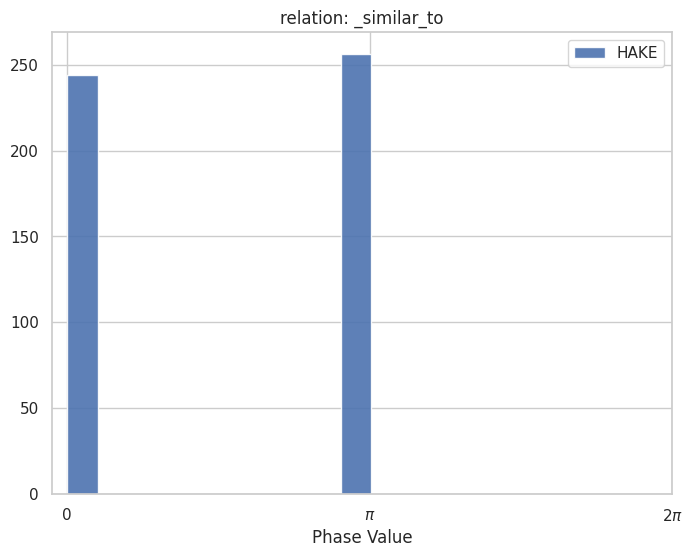

In [ ]:
relation_phase('_similar_to')

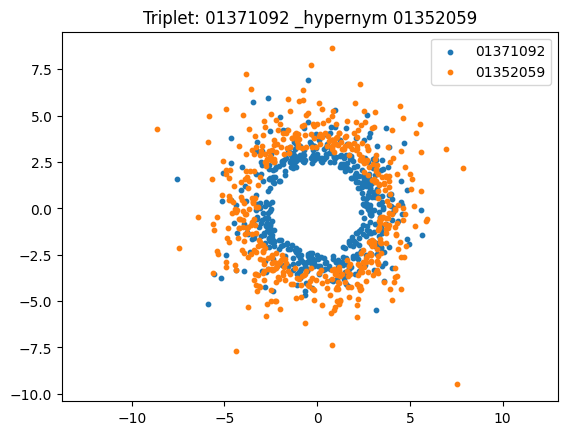

In [ ]:

"""
model_path
embedding_range
head_id
tail_id
"""

embedding_range = (6.0 + 2.0) / 500

def trace_and_visualize_triplet(triplet, entity_embedding, embedding_range):
    """
    Visualizes the transformed embeddings for the head and tail entities in a given triplet.
    Assumes entity IDs directly map to row indices in the entity_embedding array.

    Parameters:
    - triplet: A tuple of (head_id, relation, tail_id), where head_id and tail_id are integers.
    - entity_embedding: A NumPy array where each row corresponds to an entity embedding.
    - embedding_range: The range for scaling the phase component of the embeddings.
    """

    # Retrieve embeddings for the head and tail entities
    head_id = id_to_name.get(triplet[0], "Unknown ID")
    tail_id = id_to_name.get(triplet[2], "Unknown ID")
    #print(head_id, tail_id)
    head = entity_embedding[int(head_id)]
    tail = entity_embedding[int(tail_id)]

    # The rest of your processing code remains the same
    phase_head, mod_head = np.split(head, 2)
    phase_tail, mod_tail = np.split(tail, 2)
    mod_head = np.log(np.abs(mod_head)) * np.sign(mod_head)
    mod_tail = np.log(np.abs(mod_tail)) * np.sign(mod_tail)

    phase_head = phase_head / (embedding_range / np.pi)
    phase_tail = phase_tail / (embedding_range / np.pi)

    x_head, y_head = mod_head * np.cos(phase_head), mod_head * np.sin(phase_head)
    x_tail, y_tail = mod_tail * np.cos(phase_tail), mod_tail * np.sin(phase_tail)

    # Visualization
    plt.scatter(x_head, y_head, label=triplet[0], s=10)
    plt.scatter(x_tail, y_tail, label=triplet[2], s=10)
    plt.axis('equal')
    plt.title(f"Triplet: {triplet[0]} {triplet[1]} {triplet[2]}")
    plt.legend()
    plt.show()


# Example usage (ensure you define the required variables before calling the function)
# trace_and_visualize_triplet(triplet, id_to_name, entity_embedding, embedding_range)
trace_and_visualize_triplet(triplet1, entity_embedding, embedding_range)

In [ ]:
triplet1

('01371092', '_hypernym', '01352059')

In [ ]:
for i in hypernym_data:
  trace_and_visualize_triplet(i, entity_embedding, embedding_range)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for i in member_data:
  trace_and_visualize_triplet(i, entity_embedding, embedding_range)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
for i in member_data:
  trace_and_visualize_triplet(i, entity_embedding, embedding_range)

Output hidden; open in https://colab.research.google.com to view.